<a href="https://colab.research.google.com/github/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo4/animaciones/PercepNuevosEjemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación del entrenamiento del perceptrón frente a la llegada de nuevos ejemplos

Escrito por Juan Bernardo Gómez Mendoza.
Última modificación: 25 de octubre de 2024.

In [ ]:
#from docutils.nodes import legend
#from future.backports.email.base64mime import header_length
from matplotlib import pyplot as plt
import numpy as np

La siguiente función genera una gráfica con un número N de datos (puntos) en un espacio bidimensional, y una serie de flechas que ilustran el movimiento de los pesos a través del paso de las épocas. Los datos siguen una distribución normal centrada en el punto (0.8, 0.4), y con desviaciones estándar (0.1, 0.1).

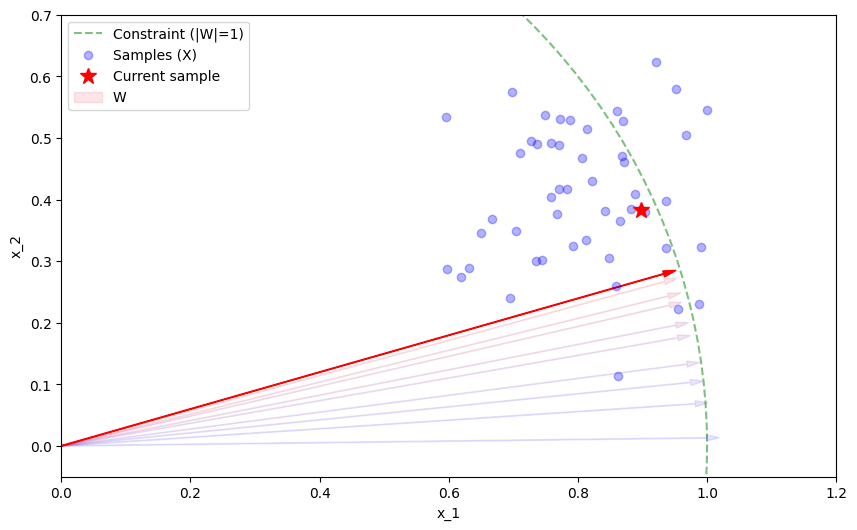

In [ ]:
def GraficaEjemplo(X, N):
    W = np.asarray([[1, 0]])
    eta = 0.1   # Tasa de aprendizaje
    # Se dibuja la circunferencia de la restricción |W|=1
    theta = np.linspace(-0.1, np.pi/2, 50)
    plt.figure(figsize=(10, 6))
    plt.plot(np.cos(theta), np.sin(theta), 'g--', alpha=0.5, \
             label='Constraint (|W|=1)')
    # Se dibujan los datos de entrenamiento (X)
    plt.plot(X[:, 0], X[:, 1], linestyle=' ', marker='o', color=(0.0, 0.0, 1.0), \
             alpha=0.3, label='Samples (X)')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.xlim([0, 1.2])
    plt.ylim([-0.05, 0.7])
    cur_color = np.asarray((0.0, 0.0, 1.0))
    cur_alpha = 0.1
    # Entrenamiento y graficación
    eta = 0.1   # Velocidad de entrenamiento
    if N>1 and N<len(X):
        delta_color = 0.99/(N-1)
        plt.plot(X[N-1,0], X[N-1,1], 'r*', markersize=12, label='Current sample')
        for i in range(N):
            W = (1-eta)*W + eta*(X[i,:]/np.linalg.norm(X[i,:]))
            # Se dibuja la posición del vector de pesos.
            if i==N-1:
                cur_alpha = 1.0
                arrow.set_label('W')
            arrow = plt.arrow(0, 0, W[0,0], W[0,1], color=cur_color, alpha=cur_alpha, \
                      head_width=0.01, head_length=0.02)
            cur_color = cur_color + np.asarray((delta_color, 0.0, -delta_color))
    plt.legend()

# Código de prueba de la función.
NUM_POINTS = 50
X = np.random.randn(NUM_POINTS, 2)*0.1 + np.repeat(np.asarray([[0.8, 0.4]]), \
                                    repeats=NUM_POINTS, axis=0)
GraficaEjemplo(X, 10)


In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(GraficaEjemplo, X=fixed(X), N=widgets.IntSlider(min=1, max=NUM_POINTS/2, step=1, value=1))

interactive(children=(IntSlider(value=1, description='N', max=25, min=1), Output()), _dom_classes=('widget-int…

<function __main__.GraficaEjemplo(X, N)>

In [ ]:
NUM_POINTS = 500
X = np.random.randn(NUM_POINTS, 2)*0.1 + np.repeat(np.asarray([[0.8, 0.4]]), \
                                    repeats=NUM_POINTS, axis=0)
# Código para generar una serie de imágenes.
for i in range(100):
    GraficaEjemplo(X, i+1)
    plt.savefig('figura%02d.png' % i)
    plt.close()